In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import losses
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import h5py
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

## PART A
#### DOMAIN:
Electronics and Telecommunication

#### CONTEXT:
A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

#### DATA DESCRIPTION:
The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality.

#### PROJECT OBJECTIVE:
To build a classifier which can use the given parameters to determine the signal strength or quality.

#### Q1. Data import and Understanding [10 Marks]
A. Read the ‘Signals.csv’ as DataFrame and import required libraries. [2 Marks]

B. Check for missing values and print percentage for each attribute. [2 Marks]

C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]

D. Visualise distribution of the target variable. [2 Marks]

E. Share insights from the initial data analysis (at least 2). [2 Marks]

In [45]:
# PartA: Q1 A: Read the ‘Signals.csv’ as DataFrame and import required libraries
signal_df = pd.read_csv('/content/drive/My Drive/ColabNotebooks/NN_Signal.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [46]:
signal_df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [48]:
signal_df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [49]:
# PartA: Q1 B: Check for missing values and print percentage for each attribute
signal_df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [50]:
signal_df.isnull().sum()/len(signal_df)*100 #taking percent

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

There are no missing values in any of the column.

In [51]:
# PartA: Q1 C: Check for presence of duplicate records in the dataset and impute with appropriate method
signal_df.duplicated().sum()

240

In [52]:
#Dropping the duplicate values
signal_df= signal_df.drop_duplicates()

In [53]:
signal_df.duplicated().sum()

0

In [54]:
signal_df.shape

(1359, 12)

<Axes: xlabel='Signal_Strength', ylabel='Count'>

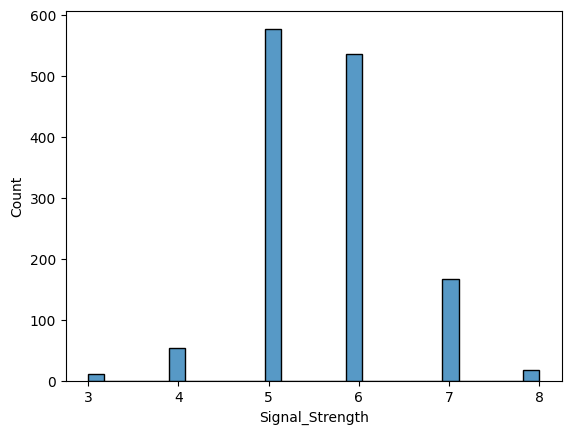

In [55]:
# PartA: Q1 D: Visualise distribution of the target variable
sns.histplot(signal_df['Signal_Strength'])

In [56]:
signal_df['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

<Axes: ylabel='Signal_Strength'>

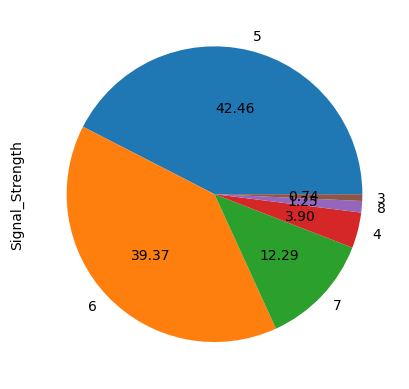

In [57]:
signal_df['Signal_Strength'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f')

In [ ]:
sns.pairplot(signal_df,diag_kind = 'kde')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# PartA: Q1 E: Share insights from the initial data analysis (at least 2)

Insights:

Total number of observations in the data are 1599 out of which 240 were duplicates. Hence dropped those 240 and then the observation count is 1359.
The data has 11 indepenedent features and target feature is Signal strength.

There are no missing values in the data.

The target variable 'Signal_Strength' has the highest value as 5 with ~42% of entire data. The next highest value is 6 with ~39% of data. This is followed by the values as 7, 4, 8, 3. Values 5 & 6 only contributes ~81% of the data.

The pair plot shows that few of the parameters are correlated with other parameters either positive or negative:
*   Most of the parameters are normal distribution with a very slight right skew.
* Paramater 1 is positively correlated with parameter 3 & 8 whereas negatively correlated with parameter 2 & 9.
* Parameter 6 & 7 are positively correlated.





#### Q2. Data preprocessing [7 Marks]

A. Split the data into X & Y. [1 Marks]

B. Split the data into train & test with 70:30 proportion.[1 Marks]

C. Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]

D. Normalise the train and test data with appropriate method. [2 Marks]

E. Transform Labels into format acceptable by Neural Network [2 Marks]

In [58]:
# PartA: Q2 A: Split the data into X & Y
X = signal_df.iloc[:, :-1] # except Signal_Strength column
Y = signal_df.iloc[:, -1] #select Signal_Strength column

In [59]:
print(X.shape)
print(Y.shape)

(1359, 11)
(1359,)


In [60]:
# PartA: Q2 B: Split the data into train & test with 70:30 proportion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,stratify=Y, random_state = 1)

In [61]:
# PartA: Q2 C: Print shape of all the 4 variables and verify if train and test data is in sync
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


In [62]:
print(Y.value_counts(normalize=True))
print(Y_train.value_counts(normalize=True))
print(Y_test.value_counts(normalize=True))

5    0.424577
6    0.393672
7    0.122884
4    0.038999
8    0.012509
3    0.007358
Name: Signal_Strength, dtype: float64
5    0.424816
6    0.393270
7    0.123028
4    0.038906
8    0.012618
3    0.007361
Name: Signal_Strength, dtype: float64
5    0.424020
6    0.394608
7    0.122549
4    0.039216
8    0.012255
3    0.007353
Name: Signal_Strength, dtype: float64


Looking at the shape & percent of distribution of target variable in train &
test dataset, it looks quite similar which make sure that data is in sync.

In [63]:
# PartA: Q2 D: Normalise the train and test data with appropriate method
X_train_normalized = preprocessing.normalize(X_train)
X_test_normalized = preprocessing.normalize(X_test)

In [64]:
print(X_test_normalized[0:2])
print(X_test.head(2))

[[0.36493227 0.01226663 0.01993328 0.06593314 0.00208533 0.21466604
  0.82799759 0.03062978 0.09383973 0.02085327 0.34653232]
 [0.14129942 0.00441561 0.00759484 0.03002613 0.00118338 0.38857339
  0.88312135 0.01756705 0.059699   0.01059746 0.21018288]]
      Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
441          11.9         0.40         0.65         2.15        0.068   
1135          8.0         0.25         0.43         1.70        0.067   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
441           7.0         27.0       0.9988         3.06          0.68   
1135         22.0         50.0       0.9946         3.38          0.60   

      Parameter 11  
441           11.3  
1135          11.9  


In [65]:
print(X_train_normalized.shape)
print(X_test_normalized.shape)

(951, 11)
(408, 11)


In [66]:
# PartA: Q2 E: Transform Labels into format acceptable by Neural Network
Y_train_encoded = to_categorical(Y_train)
Y_test_encoded = to_categorical(Y_test)

In [67]:
print(Y_train_encoded.shape)
print(Y_test_encoded.shape)

(951, 9)
(408, 9)


In [68]:
print(Y_test_encoded[0:5])
print(Y_test.head())

[[0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]]
441     6
1135    6
560     5
620     5
1094    6
Name: Signal_Strength, dtype: int64


#### Q3. Model Training & Evaluation using Neural Network [13 Marks]

A. Design a Neural Network to train a classifier. [3 Marks]

B. Train the classifier using previously designed Architecture [2 Marks]

C. Plot 2 separate visuals. [3 Marks]

  i. Training Loss and Validation Loss
  
  ii. Training Accuracy and Validation Accuracy

D. Design new architecture/update existing architecture in attempt to improve the performance of the model. [2 Marks]

E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]

In [94]:
# PartA: Q3 A: Design a Neural Network to train a classifier
#creating model
model_1 = Sequential()

In [95]:
model_1.add(Dense(256, activation='relu',input_shape=(11,)))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(9, activation='softmax'))

In [96]:
# Create optimizer with default learning rate
# Compile the model
model_1.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 256)               3072      
                                                                 
 dense_41 (Dense)            (None, 64)                16448     
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 9)                 297       
                                                                 
Total params: 26057 (101.79 KB)
Trainable params: 26057 (101.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
# PartA: Q3 B: Train the classifier using previously designed Architecture
history_1 = model_1.fit(X_train_normalized, Y_train_encoded,validation_split=0.3, batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
4/4 [==============================] - 1s 76ms/step - loss: 2.1546 - accuracy: 0.0406 - val_loss: 2.1379 - val_accuracy: 0.0559
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 2.1303 - accuracy: 0.1654 - val_loss: 2.1133 - val_accuracy: 0.4406
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 2.1060 - accuracy: 0.4331 - val_loss: 2.0876 - val_accuracy: 0.4510
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 2.0806 - accuracy: 0.4241 - val_loss: 2.0619 - val_accuracy: 0.4580
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 2.0553 - accuracy: 0.4241 - val_loss: 2.0360 - val_accuracy: 0.4685
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 2.0299 - accuracy: 0.4271 - val_loss: 2.0101 - val_accuracy: 0.4685
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 2.0044 - accuracy: 0.4271 - val_loss: 1.9836 - val_accuracy: 0.4580
Epoch 8/100
4/4 [===

In [99]:
result_1 = model_1.evaluate(X_test_normalized, Y_test_encoded)

13/13 [==============================] - 0s 2ms/step - loss: 1.2070 - accuracy: 0.4755


Text(0.5, 1.0, 'Training & Validation Loss')

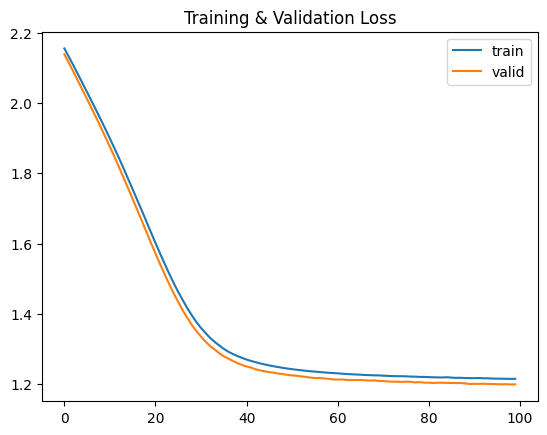

In [100]:
# PartA: Q3 C: Plot 2 separate visuals.
# i. Training Loss and Validation Loss  &
# ii. Training Accuracy and Validation Accuracy

# Capturing learning history per epoch
hist  = pd.DataFrame(history_1.history)
hist['epoch'] = history_1.epoch

# PartA: Q3 C i: Plotting Training Loss and Validation Loss at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title ('Training & Validation Loss')


Text(0.5, 1.0, 'Training & Validation Accuracy')

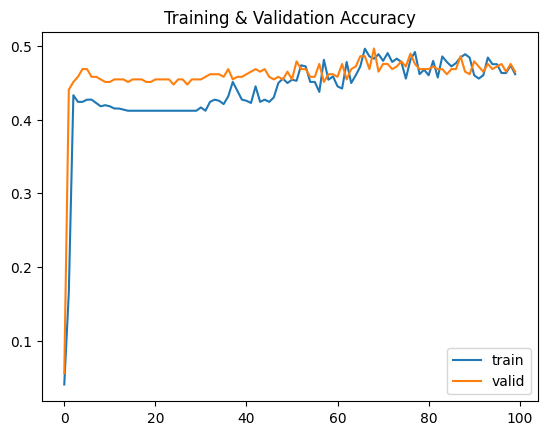

In [101]:
# PartA: Q3 C ii: Plotting Training Accuracy and Validation Accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title ('Training & Validation Accuracy')

Its clearly evident that loss is decreasing over time but its fluctuating during validation. Accuracy is fluctuating alot during both training and validation, this shows a lot of noise is added in the model.

In [ ]:
# PartA: Q3 D: Design new architecture/update existing architecture in attempt to improve the performance of the model
#creating another model


In [102]:
#creating second model
model_2 = Sequential()
model_2.add(Dense(256, activation='relu',input_shape=(11,)))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(9, activation='softmax'))

In [103]:
#Compiling second model
optimizer = tensorflow.keras.optimizers.Adam(0.001)
model_2.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [104]:
history_2 = model_2.fit(X_train_normalized, Y_train_encoded,validation_split=0.3, batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
4/4 [==============================] - 1s 82ms/step - loss: 2.1821 - accuracy: 0.1444 - val_loss: 2.1455 - val_accuracy: 0.3636
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 2.1290 - accuracy: 0.4030 - val_loss: 2.0803 - val_accuracy: 0.3706
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 2.0564 - accuracy: 0.4030 - val_loss: 1.9903 - val_accuracy: 0.3706
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 1.9607 - accuracy: 0.4030 - val_loss: 1.8742 - val_accuracy: 0.3706
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 1.8384 - accuracy: 0.4030 - val_loss: 1.7380 - val_accuracy: 0.3706
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 1.7054 - accuracy: 0.4030 - val_loss: 1.6020 - val_accuracy: 0.3706
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 1.5815 - accuracy: 0.4030 - val_loss: 1.5120 - val_accuracy: 0.3706
Epoch 8/100
4/4 [===

In [105]:
result_2 = model_2.evaluate(X_test_normalized, Y_test_encoded)

13/13 [==============================] - 0s 2ms/step - loss: 1.1224 - accuracy: 0.4975


In [108]:
#creating third model
model_3 = Sequential()
#Adding the hidden and output layers
model_3.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_shape=(11,)))
model_3.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dropout(0.5))
model_3.add(BatchNormalization())
model_3.add(Dense(9, activation='softmax'))

In [109]:
#Compiling third model
optimizer = tensorflow.keras.optimizers.Adam(0.001)
model_3.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [110]:
history_3 = model_3.fit(X_train_normalized, Y_train_encoded,validation_split=0.3, batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
4/4 [==============================] - 2s 119ms/step - loss: 2.5435 - accuracy: 0.1323 - val_loss: 2.1553 - val_accuracy: 0.0455
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 2.4426 - accuracy: 0.1429 - val_loss: 2.0733 - val_accuracy: 0.3147
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 2.3645 - accuracy: 0.2030 - val_loss: 2.0354 - val_accuracy: 0.3287
Epoch 4/100
4/4 [==============================] - 0s 25ms/step - loss: 2.2959 - accuracy: 0.1970 - val_loss: 2.0247 - val_accuracy: 0.3916
Epoch 5/100
4/4 [==============================] - 0s 24ms/step - loss: 2.2417 - accuracy: 0.2045 - val_loss: 2.0307 - val_accuracy: 0.3846
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 2.2416 - accuracy: 0.2271 - val_loss: 2.0379 - val_accuracy: 0.4021
Epoch 7/100
4/4 [==============================] - 0s 26ms/step - loss: 2.1836 - accuracy: 0.2075 - val_loss: 2.0109 - val_accuracy: 0.4091
Epoch 8/100
4/4 [==

In [147]:
result_3 = model_3.evaluate(X_test_normalized, Y_test_encoded)

13/13 [==============================] - 0s 2ms/step - loss: 1.1486 - accuracy: 0.5098


In [142]:
#creating fourth model
model_4 = Sequential()
model_4.add(Dense(256, input_shape = (11, ), kernel_initializer='he_normal'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(128, kernel_initializer='he_normal'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(64, kernel_initializer='he_normal'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(32, kernel_initializer='he_normal'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(9, kernel_initializer='he_normal'))
model_4.add(Activation('softmax'))

In [143]:
#Compiling fourth model
optimizer = tensorflow.keras.optimizers.Adam(0.001)
model_4.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [144]:
history_4 = model_4.fit(X_train_normalized, Y_train_encoded,validation_split=0.3, batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
4/4 [==============================] - 4s 404ms/step - loss: 2.6850 - accuracy: 0.1323 - val_loss: 2.3416 - val_accuracy: 0.1084
Epoch 2/100
4/4 [==============================] - 0s 22ms/step - loss: 2.5362 - accuracy: 0.1459 - val_loss: 2.3161 - val_accuracy: 0.1189
Epoch 3/100
4/4 [==============================] - 0s 21ms/step - loss: 2.3470 - accuracy: 0.2436 - val_loss: 2.2902 - val_accuracy: 0.1154
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 2.2422 - accuracy: 0.2977 - val_loss: 2.2620 - val_accuracy: 0.1259
Epoch 5/100
4/4 [==============================] - 0s 23ms/step - loss: 2.2122 - accuracy: 0.2992 - val_loss: 2.2273 - val_accuracy: 0.2413
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 2.1640 - accuracy: 0.3233 - val_loss: 2.1901 - val_accuracy: 0.3427
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 2.0471 - accuracy: 0.3639 - val_loss: 2.1547 - val_accuracy: 0.3741
Epoch 8/100
4/4 [==

In [148]:
result_4 = model_4.evaluate(X_test_normalized, Y_test_encoded)

13/13 [==============================] - 0s 3ms/step - loss: 1.1289 - accuracy: 0.5221


Text(0.5, 1.0, 'Training & Validation Loss- Model 2')

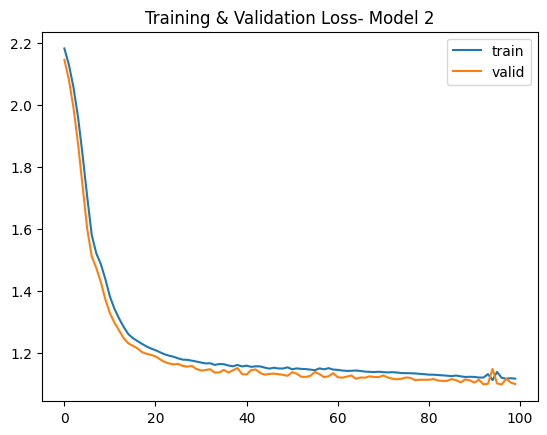

In [130]:
# PartA: Q3 E: Plot visuals as in Q3.C and share insights about difference observed in both the models
#First lets try plotting for model_2

hist  = pd.DataFrame(history_2.history)
hist['epoch'] = history_2.epoch

#Plotting Training Loss and Validation Loss at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title ('Training & Validation Loss- Model 2')


Text(0.5, 1.0, 'Training & Validation Accuracy- Model 2')

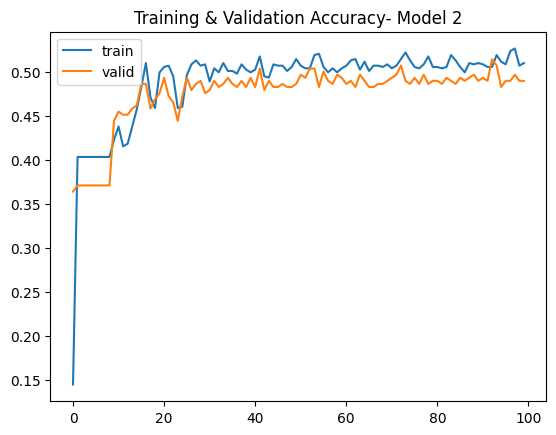

In [107]:
#Plotting Training Accuracy and Validation Accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title ('Training & Validation Accuracy- Model 2')

Text(0.5, 1.0, 'Training & Validation Loss- Model 3')

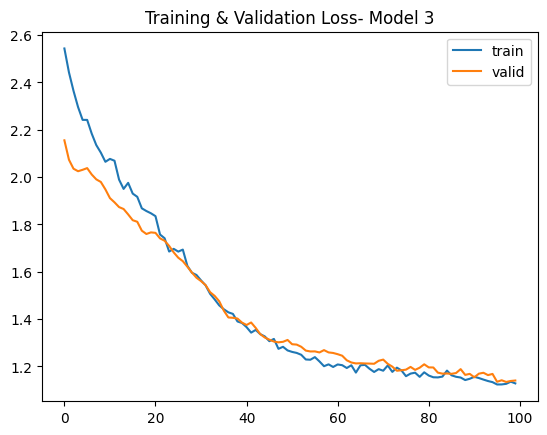

In [112]:
#Lets try plotting for model_3

hist  = pd.DataFrame(history_3.history)
hist['epoch'] = history_3.epoch

#Plotting Training Loss and Validation Loss at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title ('Training & Validation Loss- Model 3')

Text(0.5, 1.0, 'Training & Validation Accuracy- Model 3')

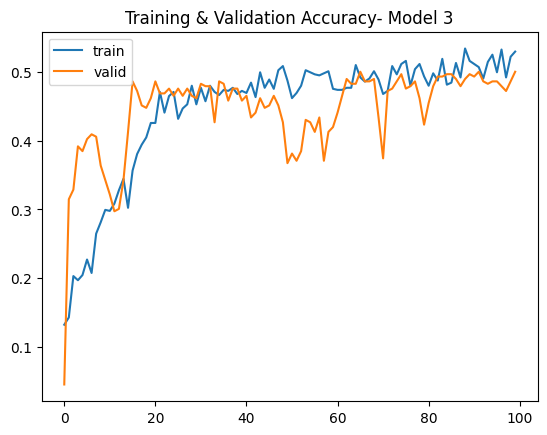

In [113]:
#Plotting Training Accuracy and Validation Accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title ('Training & Validation Accuracy- Model 3')

Text(0.5, 1.0, 'Training & Validation Loss- Model 4')

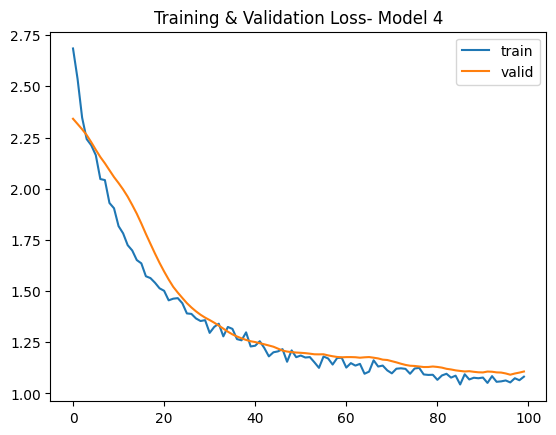

In [145]:
#Lets try plotting for model_4

hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

#Plotting Training Loss and Validation Loss at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title ('Training & Validation Loss- Model 4')

Text(0.5, 1.0, 'Training & Validation Accuracy- Model 4')

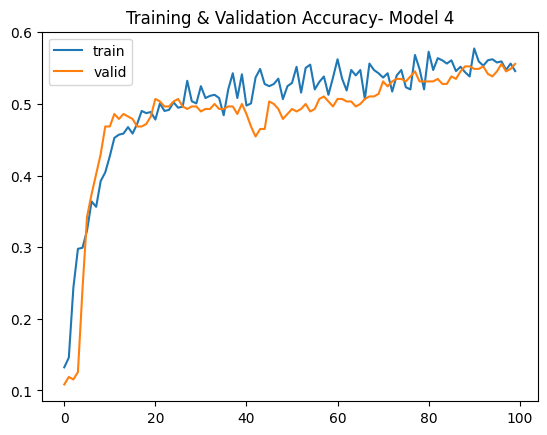

In [146]:
#Plotting Training Accuracy and Validation Accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title ('Training & Validation Accuracy- Model 4')

Model 1 is the base model with relu activation, SGD optimizer and default learning rate has accuracy ~47%.

Model 2 is having Adam optimizer and has accuracy ~50% but the plot shows that there is some noise captured in the model.

In Model 3, I used Batch Normalization & Dropout before output layer , its accuracy is ~51% but the plot shows that it has captured a lot more noise than model 2.

In Model 4, I used Batch Normalization & Dropout at each layer and the accuracy is ~52%. the plot still shows the noise captured in the model.

Model 4 performance is definetely better than other models and is clearly evident that loss is decreasing and accuracy is increasing. We can still see some fluctutaions due to noise being captured in the model.

Though its still not great and we can also try hypertuning the learning rate & batch size using GridSearch but I am skipping it as of now considering the scope of this project.

## PART B
#### DOMAIN:
Autonomous Vehicles

#### CONTEXT:
A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors

#### DATA DESCRIPTION:
The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised
Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site

#### PROJECT OBJECTIVE:
To build a digit classifier on the SVHN (Street View Housing Number) dataset

#### Q1. Data Import and Exploration [5 Marks]

A. Read the .h5 file and assign to a variable. [2 Marks]

B. Print all the keys from the .h5 file. [1 Marks]

C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]

In [3]:
# PartB: Q1 A: Read the .h5 file and assign to a variable
import h5py
#Reading .h5 file
hf = h5py.File('/content/drive/My Drive/ColabNotebooks/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [4]:
# PartB: Q1 B: Print all the keys from the .h5 file
hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [5]:
# PartB: Q1 C: Split the data into X_train, X_test, Y_train, Y_test
#Using get will return the dataset object and using np.array will convert it to an array
X_test= np.array(hf.get('X_test'))
X_train= np.array(hf.get('X_train'))
y_test = np.array(hf.get('y_test'))
y_train= np.array(hf.get('y_train'))

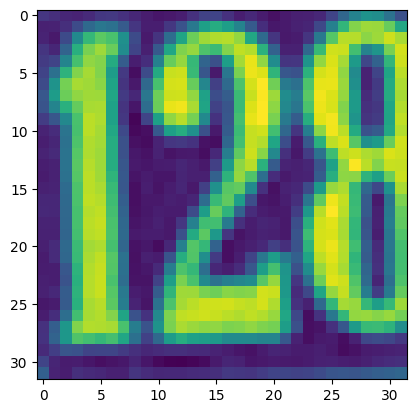

Label:  2


In [6]:
#printing the shapes of the dataset object in .h5 file
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

#### Q2. Data Visualisation and preprocessing [13 Marks]

A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]

B. Visualise first 10 images in train data and print its corresponding labels. [4 Marks]

C. Reshape all the images with appropriate shape update the data in same variable. [3 Marks]

D. Normalise the images i.e. Normalise the pixel values. [2 Marks]

E. Transform Labels into format acceptable by Neural Network [2 Marks]

F. Print total Number of classes in the Dataset. [1 Marks]

In [7]:
# PartB: Q2 A: Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 32, 32) (18000, 32, 32) (42000,) (18000,)


The train & test data looks in synce as their shape is same. X_train has 42000 as y_train and similarly X_test has 18000 just as y_test

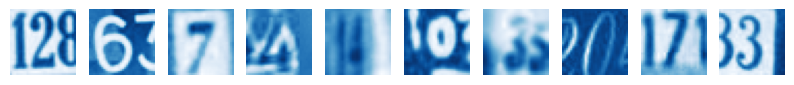

Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [8]:
# PartB: Q2 B: Visualise first 10 images in train data and print its corresponding labels

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="Blues")
    plt.axis('off')
plt.show()
print('Label for each of the above image: %s' % (y_train[0:10]))

In [9]:
# PartB: Q2 C: Reshape all the images with appropriate shape update the data in same variable
# reshaping X data: (n, 32, 32) => (n, 1024)
image_vector_size = 32*32
X_train_reshaped = X_train.reshape((X_train.shape[0], image_vector_size))
X_test_reshaped = X_test.reshape((X_test.shape[0], image_vector_size))
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)

(42000, 1024)
(18000, 1024)


In [10]:
# PartB: Q2 D:  Normalise the images i.e. Normalise the pixel values
X_train_norm = X_train_reshaped / 255.0
X_test_norm = X_test_reshaped / 255.0

In [11]:
# PartB: Q2 E:  Transform Labels into format acceptable by Neural Network
# Convert to "one-hot" vectors using the to_categorical function
# num of classes = 10
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test,10)

In [12]:
print("First 5 training lables as one-hot encoded vectors:\n", y_train_encoded[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [13]:
# PartB: Q2 F:  Print total Number of classes in the Dataset
print("The total number of classes are: " , len(np.unique(y_train)))
print("The unique classes are: ", np.unique(y_train))

The total number of classes are:  10
The unique classes are:  [0 1 2 3 4 5 6 7 8 9]


#### Q3. Model Training & Evaluation using Neural Network [12 Marks]

A. Design a Neural Network to train a classifier. [3 Marks]

B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]

C. Evaluate performance of the model with appropriate metrics. [2 Marks]

D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
observations on the same. [4 Marks]

In [14]:
# PartB: Q3 A:  Design a Neural Network to train a classifier
image_size= 32*32
# creating first model
model_1 = Sequential()

model_1.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(10, activation='softmax'))

In [15]:
# Compiling first model
adam = optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [16]:
# Looking into base model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 285418 (1.09 MB)
Trainable params: 285418 (1.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
#creating 2nd model
model_2 = Sequential()
model_2.add(Dense(256,activation='relu',input_shape=(image_size,)))
model_2.add(BatchNormalization())
model_2.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model_2.add(BatchNormalization())
model_2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model_2.add(BatchNormalization())
model_2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(10, activation = 'softmax'))

In [23]:
#compiling second model
adam = optimizers.Adam(learning_rate=0.001)
model_2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
#Creating 3rd model
model_3 = Sequential()
model_3.add(Dense(256,activation='relu',input_shape=(image_size,)))
model_3.add(BatchNormalization())
model_3.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model_3.add(BatchNormalization())
model_3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model_3.add(BatchNormalization())
model_3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dense(10, activation = 'softmax'))

In [37]:
#compiling the third model
sgd = optimizers.SGD(learning_rate = 0.001)
model_3.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
# PartB: Q3 B:  Train the classifier using previously designed Architecture (Use best suitable parameters)
# Fit the first model
history_1=model_1.fit(X_train_norm, y_train_encoded, validation_split=0.2, epochs=20, batch_size=128, verbose=2)

Epoch 1/20
263/263 - 4s - loss: 2.3094 - accuracy: 0.1031 - val_loss: 2.3026 - val_accuracy: 0.0899 - 4s/epoch - 16ms/step
Epoch 2/20
263/263 - 2s - loss: 2.2821 - accuracy: 0.1136 - val_loss: 2.1894 - val_accuracy: 0.1582 - 2s/epoch - 7ms/step
Epoch 3/20
263/263 - 2s - loss: 1.9359 - accuracy: 0.2671 - val_loss: 1.8783 - val_accuracy: 0.3062 - 2s/epoch - 7ms/step
Epoch 4/20
263/263 - 2s - loss: 1.6242 - accuracy: 0.4190 - val_loss: 1.5624 - val_accuracy: 0.4585 - 2s/epoch - 7ms/step
Epoch 5/20
263/263 - 2s - loss: 1.4254 - accuracy: 0.5110 - val_loss: 1.3555 - val_accuracy: 0.5406 - 2s/epoch - 7ms/step
Epoch 6/20
263/263 - 2s - loss: 1.2862 - accuracy: 0.5707 - val_loss: 1.2651 - val_accuracy: 0.5876 - 2s/epoch - 7ms/step
Epoch 7/20
263/263 - 3s - loss: 1.1881 - accuracy: 0.6178 - val_loss: 1.1367 - val_accuracy: 0.6383 - 3s/epoch - 11ms/step
Epoch 8/20
263/263 - 2s - loss: 1.1197 - accuracy: 0.6457 - val_loss: 1.0995 - val_accuracy: 0.6539 - 2s/epoch - 7ms/step
Epoch 9/20
263/263 - 2

In [24]:
# Fit the second model
history_2 =model_2.fit(X_train_norm, y_train_encoded, validation_split=0.2, epochs=20, batch_size=128, verbose=2)

Epoch 1/20
263/263 - 6s - loss: 1.5907 - accuracy: 0.4769 - val_loss: 1.9714 - val_accuracy: 0.3725 - 6s/epoch - 22ms/step
Epoch 2/20
263/263 - 2s - loss: 1.0634 - accuracy: 0.6651 - val_loss: 2.8948 - val_accuracy: 0.2774 - 2s/epoch - 8ms/step
Epoch 3/20
263/263 - 2s - loss: 0.9460 - accuracy: 0.7024 - val_loss: 2.5619 - val_accuracy: 0.3544 - 2s/epoch - 8ms/step
Epoch 4/20
263/263 - 2s - loss: 0.8569 - accuracy: 0.7315 - val_loss: 1.5710 - val_accuracy: 0.5204 - 2s/epoch - 9ms/step
Epoch 5/20
263/263 - 2s - loss: 0.7823 - accuracy: 0.7529 - val_loss: 1.3669 - val_accuracy: 0.5685 - 2s/epoch - 9ms/step
Epoch 6/20
263/263 - 4s - loss: 0.7197 - accuracy: 0.7737 - val_loss: 1.3085 - val_accuracy: 0.5777 - 4s/epoch - 14ms/step
Epoch 7/20
263/263 - 2s - loss: 0.6870 - accuracy: 0.7838 - val_loss: 1.1390 - val_accuracy: 0.6468 - 2s/epoch - 9ms/step
Epoch 8/20
263/263 - 2s - loss: 0.6601 - accuracy: 0.7907 - val_loss: 1.1362 - val_accuracy: 0.6245 - 2s/epoch - 8ms/step
Epoch 9/20
263/263 - 2

In [38]:
# Fit the third model
history_3=model_3.fit(X_train_norm, y_train_encoded, validation_split=0.2, epochs=100, batch_size=128, verbose=2)

Epoch 1/100
263/263 - 5s - loss: 2.6140 - accuracy: 0.1240 - val_loss: 2.4041 - val_accuracy: 0.1230 - 5s/epoch - 17ms/step
Epoch 2/100
263/263 - 2s - loss: 2.3562 - accuracy: 0.1759 - val_loss: 2.2787 - val_accuracy: 0.1849 - 2s/epoch - 7ms/step
Epoch 3/100
263/263 - 2s - loss: 2.2057 - accuracy: 0.2226 - val_loss: 2.1766 - val_accuracy: 0.2344 - 2s/epoch - 7ms/step
Epoch 4/100
263/263 - 2s - loss: 2.0914 - accuracy: 0.2657 - val_loss: 2.0913 - val_accuracy: 0.2698 - 2s/epoch - 7ms/step
Epoch 5/100
263/263 - 2s - loss: 1.9950 - accuracy: 0.3087 - val_loss: 1.9769 - val_accuracy: 0.3126 - 2s/epoch - 7ms/step
Epoch 6/100
263/263 - 2s - loss: 1.9103 - accuracy: 0.3435 - val_loss: 1.8920 - val_accuracy: 0.3535 - 2s/epoch - 7ms/step
Epoch 7/100
263/263 - 3s - loss: 1.8377 - accuracy: 0.3800 - val_loss: 1.8256 - val_accuracy: 0.3849 - 3s/epoch - 10ms/step
Epoch 8/100
263/263 - 2s - loss: 1.7664 - accuracy: 0.4104 - val_loss: 1.7659 - val_accuracy: 0.4071 - 2s/epoch - 9ms/step
Epoch 9/100
26

In [18]:
# predicting the first model on test data
y_pred_1=model_1.predict(X_test_norm)

563/563 [==============================] - 1s 2ms/step


In [19]:
y_pred_final_1=[]
for i in y_pred_1:
  y_pred_final_1.append(np.argmax(i))

In [25]:
# predicting the second model on test data
y_pred_2=model_2.predict(X_test_norm)

563/563 [==============================] - 2s 3ms/step


In [26]:
y_pred_final_2=[]
for i in y_pred_2:
  y_pred_final_2.append(np.argmax(i))

In [77]:
# predicting the third model on test data
y_pred_3=model_3.predict(X_test_norm)
y_pred_final_3=[]
for i in y_pred_3:
  y_pred_final_3.append(np.argmax(i))

563/563 [==============================] - 1s 2ms/step


In [20]:
# PartB: Q3 C:  Evaluate performance of the model with appropriate metrics
#Printing classification report of first model
print(classification_report(y_test,y_pred_final_1))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1814
           1       0.70      0.82      0.76      1828
           2       0.77      0.74      0.75      1803
           3       0.72      0.70      0.71      1719
           4       0.78      0.80      0.79      1812
           5       0.70      0.71      0.70      1768
           6       0.81      0.69      0.74      1832
           7       0.73      0.80      0.76      1808
           8       0.74      0.69      0.71      1812
           9       0.69      0.72      0.71      1804

    accuracy                           0.74     18000
   macro avg       0.74      0.74      0.74     18000
weighted avg       0.74      0.74      0.74     18000



Text(95.72222222222221, 0.5, 'Truth')

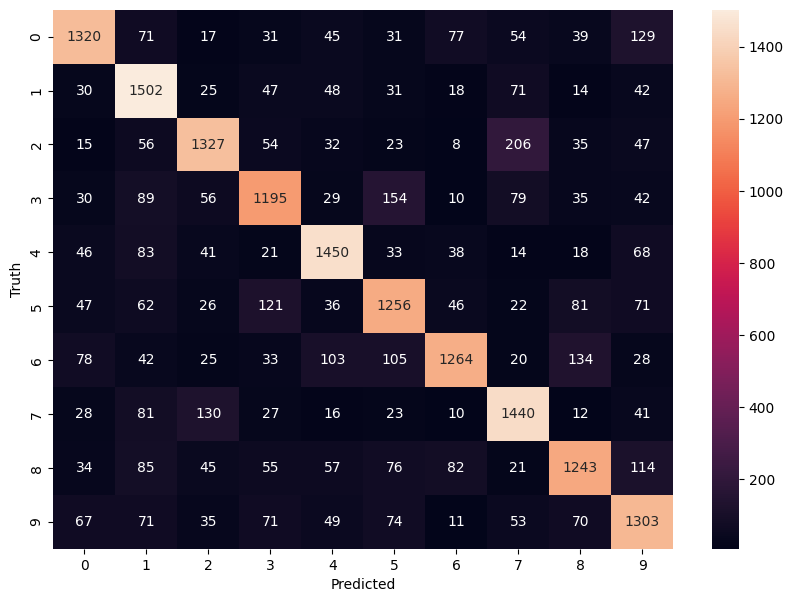

In [21]:
#Plotting confusion matrix for first model
cm_1=confusion_matrix(y_test,y_pred_final_1)
plt.figure(figsize=(10,7))
sns.heatmap(cm_1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
#Printing classification report of second model
print(classification_report(y_test,y_pred_final_2))

              precision    recall  f1-score   support

           0       0.75      0.68      0.72      1814
           1       0.57      0.66      0.62      1828
           2       0.59      0.77      0.67      1803
           3       0.44      0.55      0.48      1719
           4       0.74      0.76      0.75      1812
           5       0.75      0.48      0.58      1768
           6       0.67      0.56      0.61      1832
           7       0.71      0.70      0.70      1808
           8       0.56      0.70      0.62      1812
           9       0.84      0.57      0.68      1804

    accuracy                           0.64     18000
   macro avg       0.66      0.64      0.64     18000
weighted avg       0.66      0.64      0.64     18000



Text(95.72222222222221, 0.5, 'Truth')

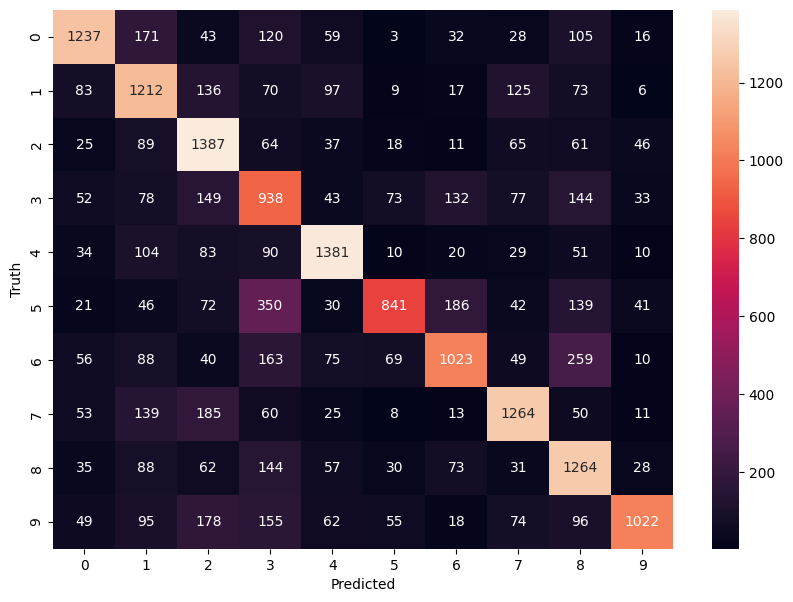

In [28]:
#Plotting confusion matrix for second model
cm_2=confusion_matrix(y_test,y_pred_final_2)
plt.figure(figsize=(10,7))
sns.heatmap(cm_2,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
#Printing classification report of third model
print(classification_report(y_test,y_pred_final_3))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1814
           1       0.77      0.79      0.78      1828
           2       0.77      0.77      0.77      1803
           3       0.65      0.74      0.70      1719
           4       0.71      0.84      0.77      1812
           5       0.71      0.76      0.73      1768
           6       0.81      0.73      0.76      1832
           7       0.82      0.77      0.80      1808
           8       0.74      0.69      0.71      1812
           9       0.75      0.72      0.73      1804

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000



Text(95.72222222222221, 0.5, 'Truth')

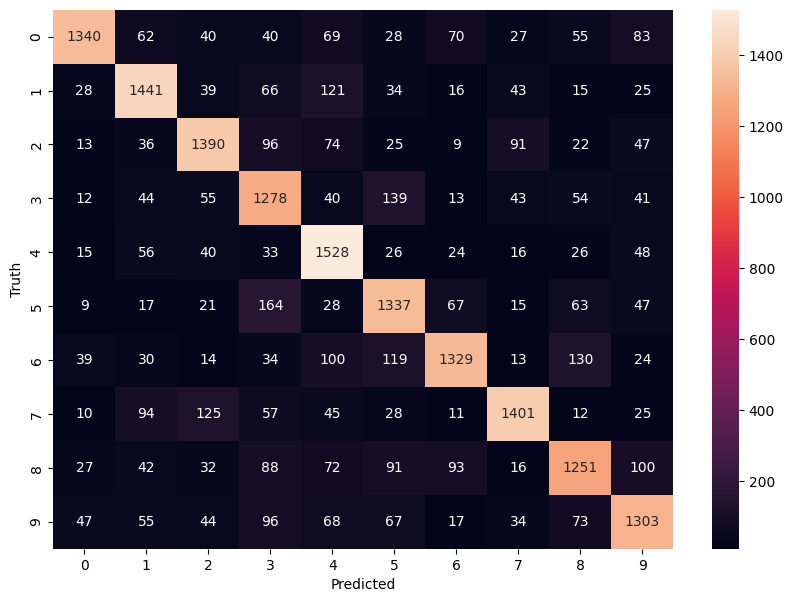

In [44]:
#Plotting confusion matrix for third model
cm_3=confusion_matrix(y_test,y_pred_final_3)
plt.figure(figsize=(10,7))
sns.heatmap(cm_3,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# PartB: Q3 D:  Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

Text(0.5, 1.0, 'Training & Validation Loss- Model 1')

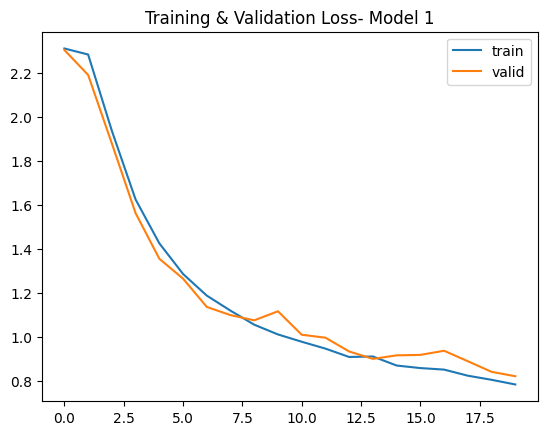

In [29]:
#First lets try plotting for model_1

hist_1  = pd.DataFrame(history_1.history)
hist_1['epoch'] = history_1.epoch

#Plotting Training Loss and Validation Loss at different epochs
plt.plot(hist_1['loss'])
plt.plot(hist_1['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title ('Training & Validation Loss- Model 1')

Text(0.5, 1.0, 'Training & Validation Accuracy- Model 1')

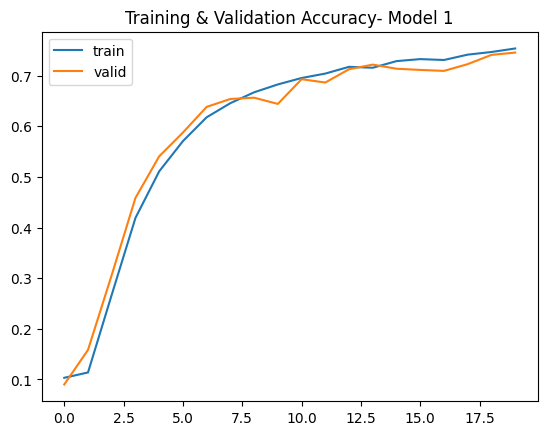

In [30]:
#Plotting Training Loss and Validation Loss at different epochs
plt.plot(hist_1['accuracy'])
plt.plot(hist_1['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title ('Training & Validation Accuracy- Model 1')

Text(0.5, 1.0, 'Training & Validation Loss- Model 2')

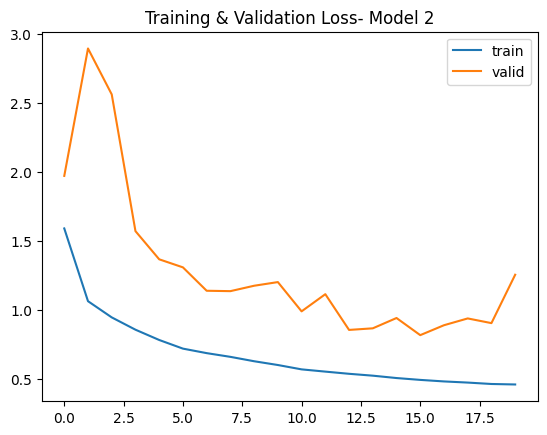

In [31]:
#Now lets try plotting for model_2

hist_2  = pd.DataFrame(history_2.history)
hist_2['epoch'] = history_2.epoch

#Plotting Training Loss and Validation Loss at different epochs
plt.plot(hist_2['loss'])
plt.plot(hist_2['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title ('Training & Validation Loss- Model 2')

Text(0.5, 1.0, 'Training & Validation Accuracy- Model 2')

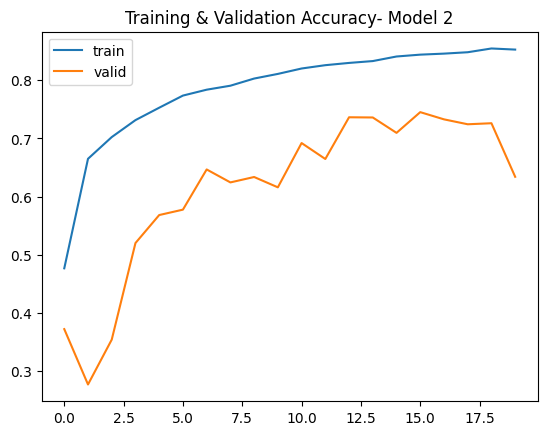

In [32]:
#Plotting Training Loss and Validation Loss at different epochs
plt.plot(hist_2['accuracy'])
plt.plot(hist_2['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title ('Training & Validation Accuracy- Model 2')

Text(0.5, 1.0, 'Training & Validation Loss- Model 3')

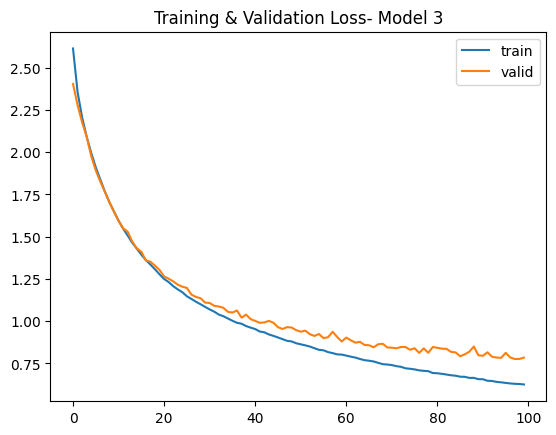

In [39]:
#Now lets try plotting for model_3

hist_3  = pd.DataFrame(history_3.history)
hist_3['epoch'] = history_3.epoch

#Plotting Training Loss and Validation Loss at different epochs
plt.plot(hist_3['loss'])
plt.plot(hist_3['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title ('Training & Validation Loss- Model 3')

Text(0.5, 1.0, 'Training & Validation Accuracy- Model 3')

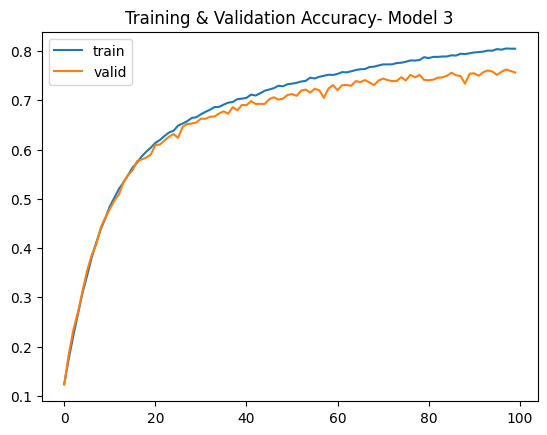

In [40]:
#Plotting Training Loss and Validation Loss at different epochs
plt.plot(hist_3['accuracy'])
plt.plot(hist_3['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title ('Training & Validation Accuracy- Model 3')

I created 3 models

1) The first one is a base model with relu activation in each layer, weight initializer as HE and Adam optimizer. The accuracy is ~74% and the plot show that model is not overfitting.

2) For the second model I used Batch initializer additionaly but the accuracy is not great. It rather decreased to 64% and plots clearly shows the model is overfitting the training data and is not performing good in test data.

3) I changed optimization to SGD in the third model and accuracy increased to ~76%. This is performing good with little noise in test data but overall, its the best model.